In [2]:
import tarfile

# Path to your file
tar_path = "a_fullperiod_10sec_100hosts.tar"

# Open and extract
with tarfile.open(tar_path, "r") as tar:
    tar.extractall("extracted_files")  # Extract to a folder
    tar.list()  # Optional: print list of contents

?rwxrwsr-x shinw/stf218          0 2022-04-02 00:00:26 ./a_fullperiod_10sec_100hosts/ 
?rw-rw-r-- shinw/shinw   32880933 2022-04-01 22:43:22 ./a_fullperiod_10sec_100hosts/20210803.parquet 
?rw-rw-r-- shinw/shinw   32397531 2022-04-01 22:39:19 ./a_fullperiod_10sec_100hosts/20210222.parquet 
?rw-rw-r-- shinw/shinw   37223265 2022-04-01 22:55:57 ./a_fullperiod_10sec_100hosts/20220109.parquet 
?rw-rw-r-- shinw/shinw   34455888 2022-04-01 22:21:34 ./a_fullperiod_10sec_100hosts/20200811.parquet 
?rw-rw-r-- shinw/shinw   35692951 2022-04-01 22:59:48 ./a_fullperiod_10sec_100hosts/20220118.parquet 
?rw-rw-r-- shinw/shinw   33147358 2022-04-01 22:18:32 ./a_fullperiod_10sec_100hosts/20200804.parquet 
?rw-rw-r-- shinw/shinw   33508098 2022-04-01 22:47:26 ./a_fullperiod_10sec_100hosts/20210812.parquet 
?rw-rw-r-- shinw/shinw   55555380 2022-04-01 22:16:24 ./a_fullperiod_10sec_100hosts/20200129.parquet 
?rw-rw-r-- shinw/shinw   31196685 2022-04-01 22:12:36 ./a_fullperiod_10sec_100hosts/20200121.parq

In [6]:
import pandas as pd
import os

# Path to the folder with extracted Parquet files
folder_path = "extracted_files/a_fullperiod_10sec_100hosts"  # adjust this to your actual path

# List all Parquet files and load them
dfs = []
for file in os.listdir(folder_path):
    if file.endswith(".parquet"):
        full_path = os.path.join(folder_path, file)
        df = pd.read_parquet(full_path)
        df["file"] = file
        dfs.append(df)

# Combine all into one DataFrame (if they have the same schema)
full_df = pd.concat(dfs, ignore_index=True)

print(full_df.head())

                  timestamp  node_state hostname  ps0_input_power  \
0 2022-01-24 00:00:00+00:00  Powered On   a03n09       529.599976   
1 2022-01-24 00:00:10+00:00  Powered On   a03n09       534.200012   
2 2022-01-24 00:00:20+00:00  Powered On   a03n09       531.099976   
3 2022-01-24 00:00:30+00:00  Powered On   a03n09       530.400024   
4 2022-01-24 00:00:40+00:00  Powered On   a03n09       529.000000   

   ps1_input_power  p0_gpu0_power  p0_gpu1_power  p0_gpu2_power  \
0       473.200012      50.200001      48.400002      49.900002   
1       480.500000      50.200001      48.099998      49.900002   
2       473.700012      50.099998      48.400002      49.400002   
3       475.000000      50.299999      48.299999      49.500000   
4       476.299988      50.099998      48.099998      49.700001   

   p1_gpu0_power  p1_gpu1_power  ...  gpu3_mem_temp  gpu4_mem_temp  \
0      48.299999      49.000000  ...           30.0           30.0   
1      48.599998      49.000000  ...      

In [11]:
print(dfs[0].columns)

Index(['timestamp', 'node_state', 'hostname', 'ps0_input_power',
       'ps1_input_power', 'p0_gpu0_power', 'p0_gpu1_power', 'p0_gpu2_power',
       'p1_gpu0_power', 'p1_gpu1_power', 'p1_gpu2_power', 'p0_power',
       'p1_power', 'gpu0_core_temp', 'gpu1_core_temp', 'gpu2_core_temp',
       'gpu3_core_temp', 'gpu4_core_temp', 'gpu5_core_temp', 'gpu0_mem_temp',
       'gpu1_mem_temp', 'gpu2_mem_temp', 'gpu3_mem_temp', 'gpu4_mem_temp',
       'gpu5_mem_temp', 'p0_temp_max', 'p0_temp_mean', 'p0_temp_min',
       'p1_temp_max', 'p1_temp_mean', 'p1_temp_min', 'file'],
      dtype='object')


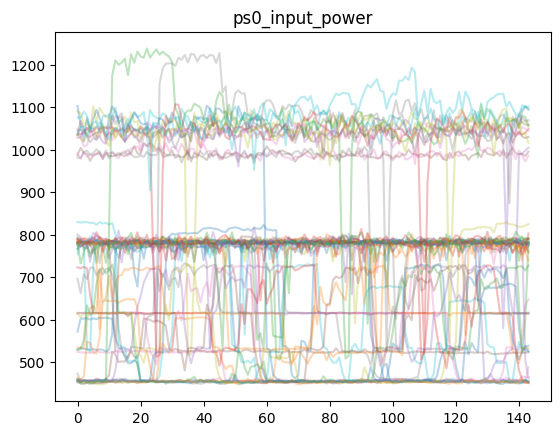

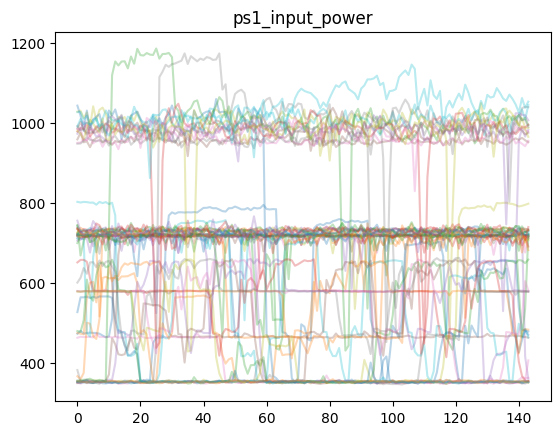

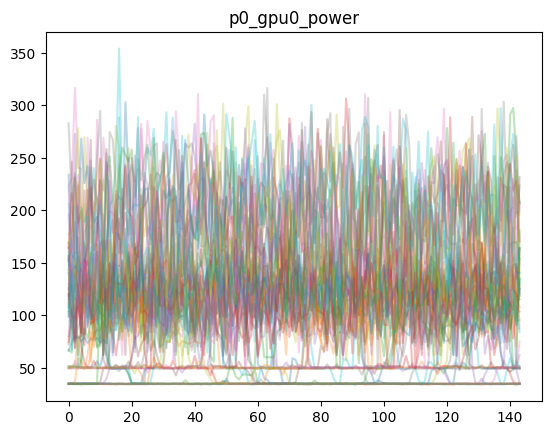

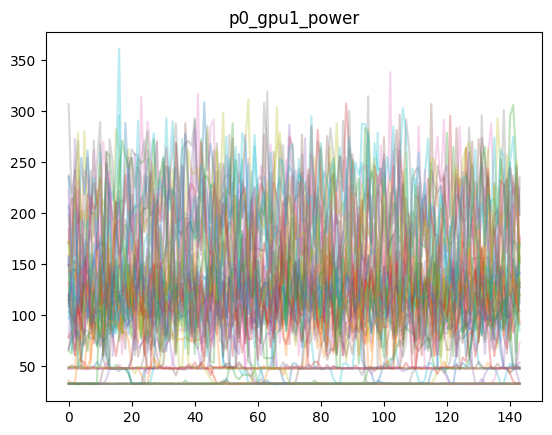

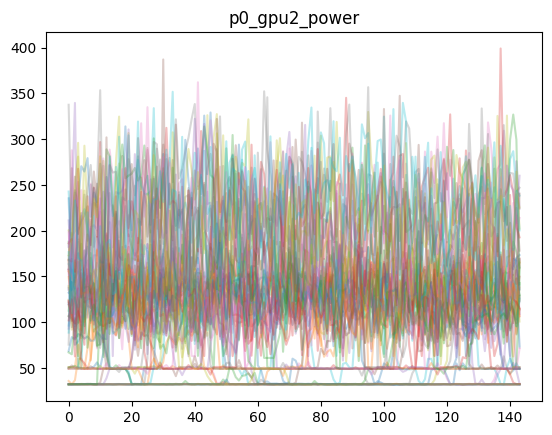

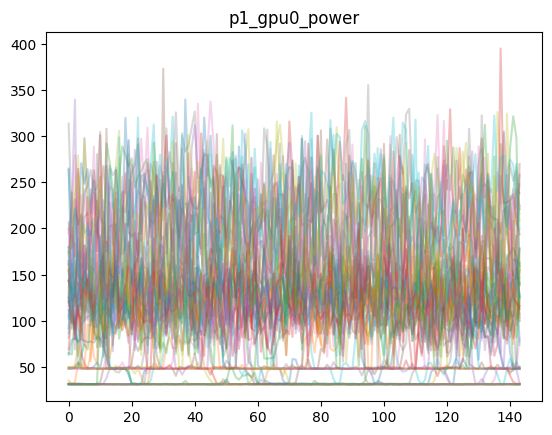

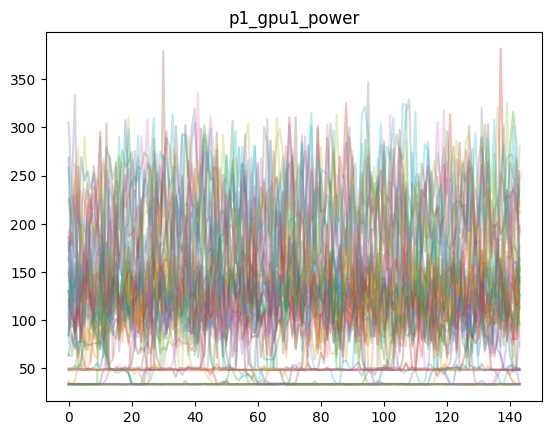

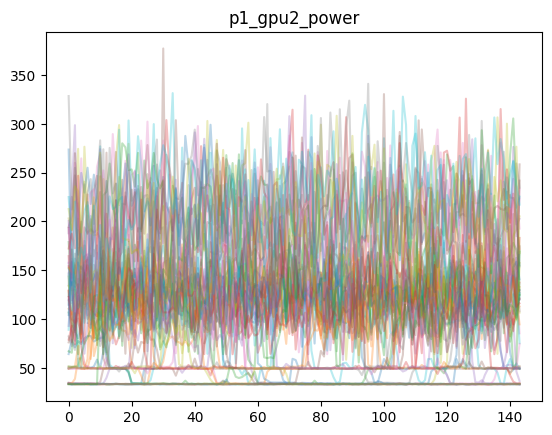

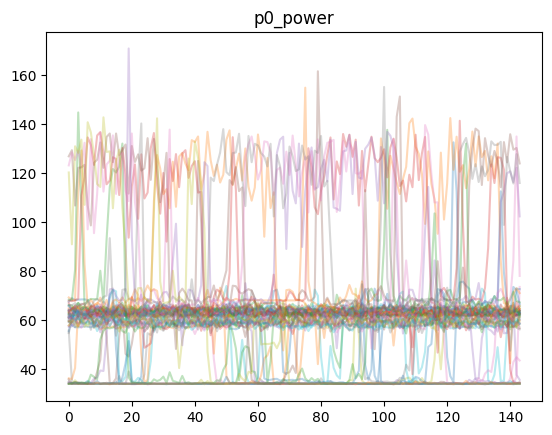

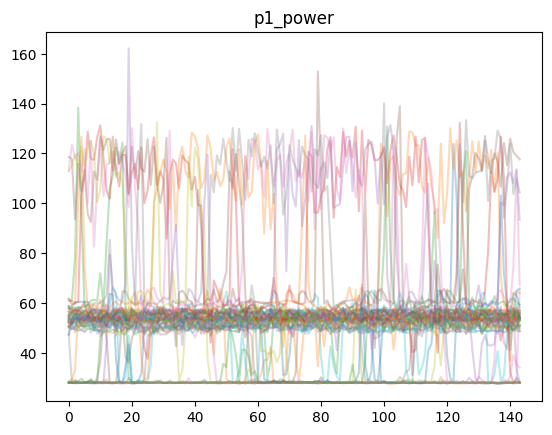

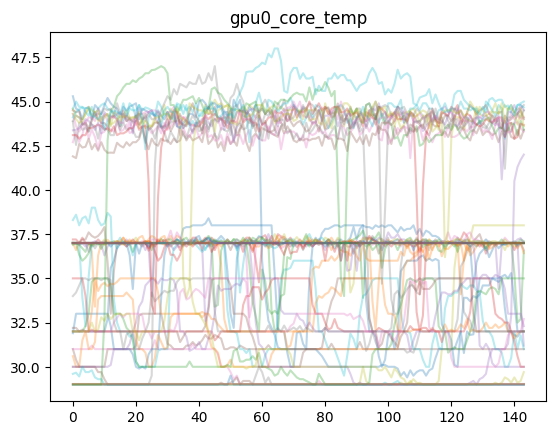

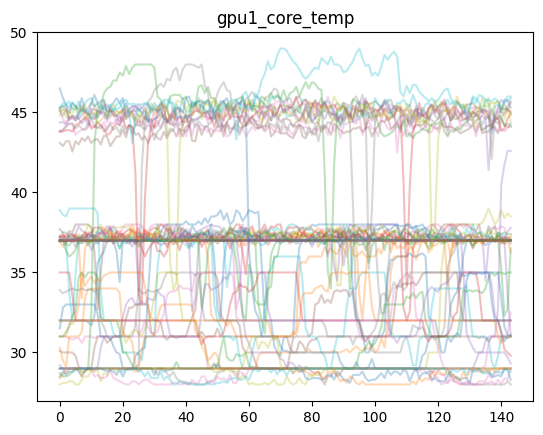

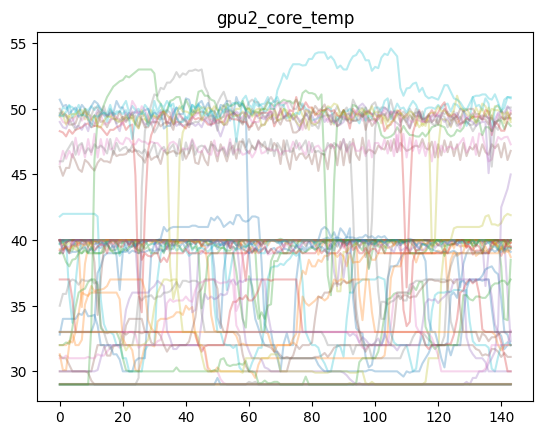

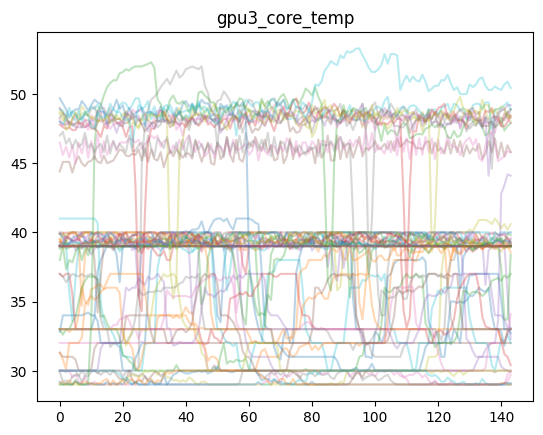

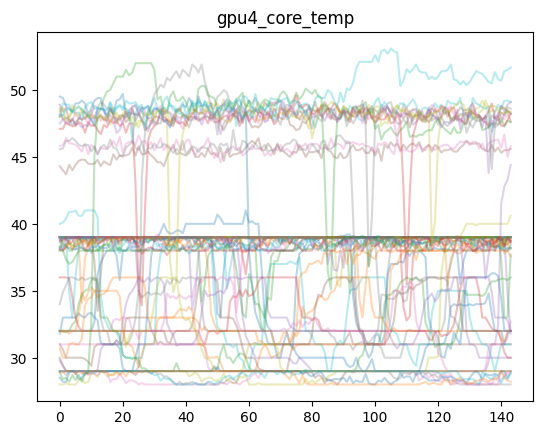

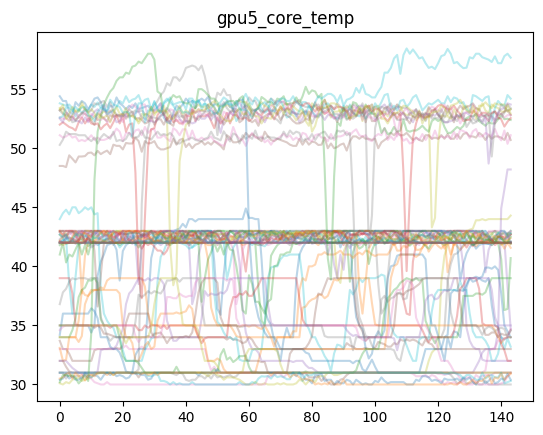

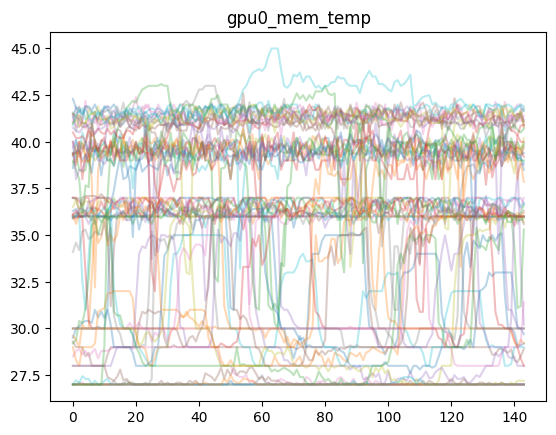

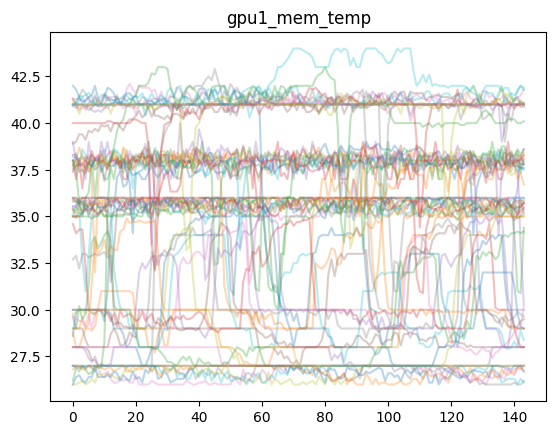

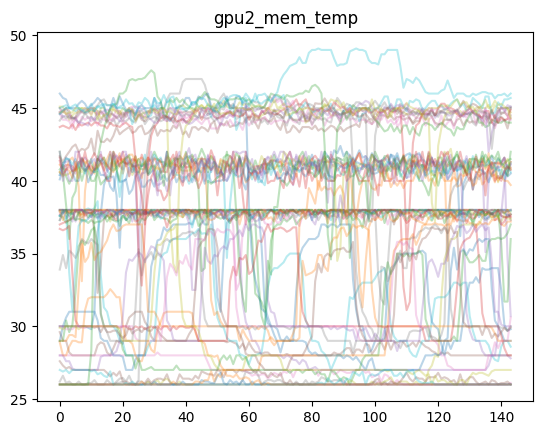

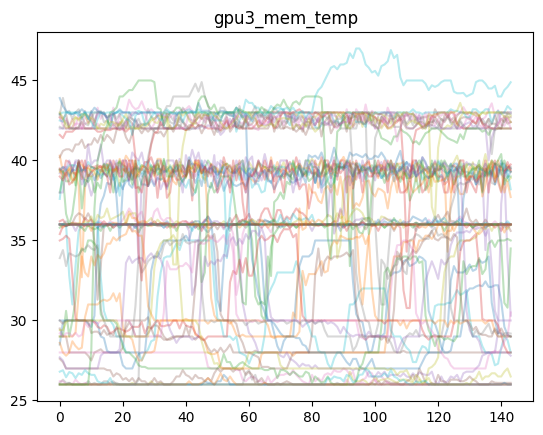

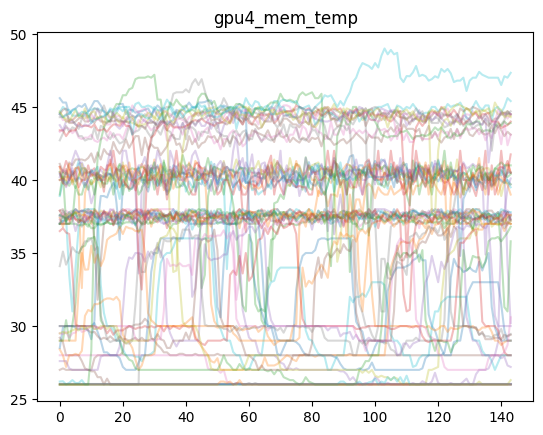

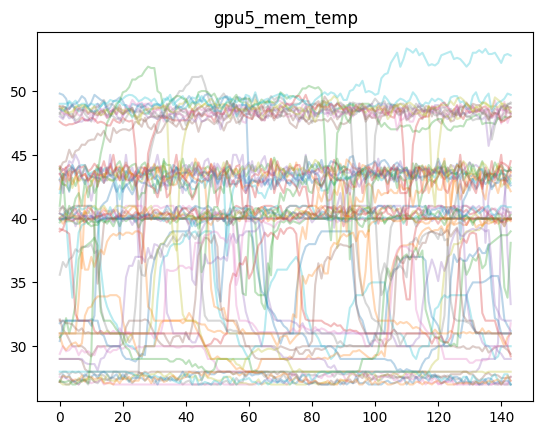

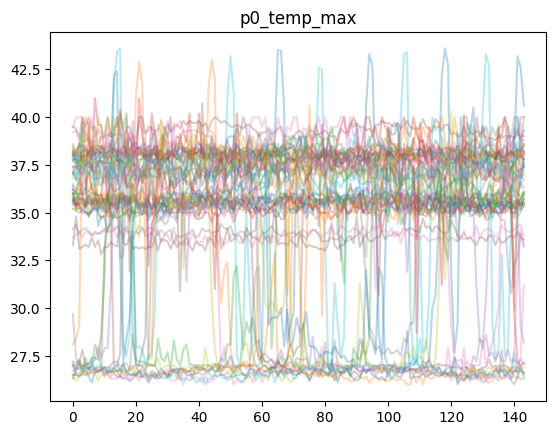

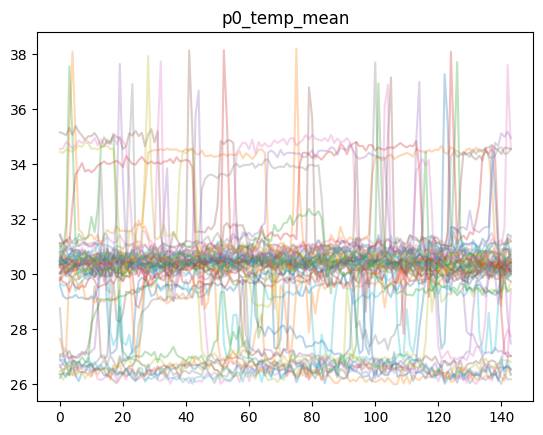

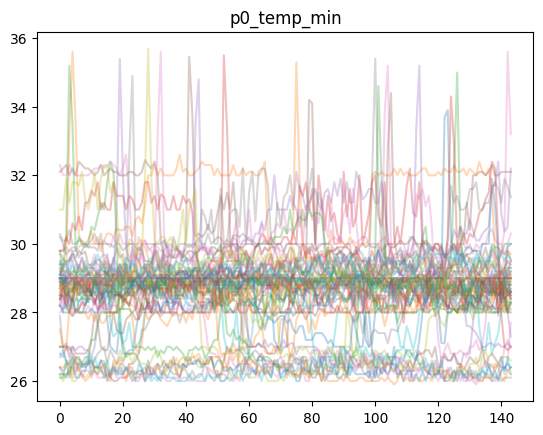

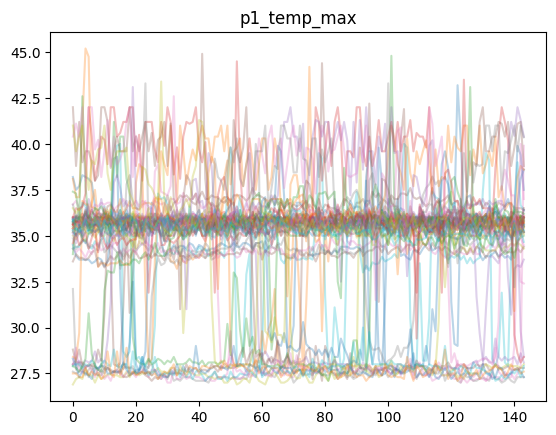

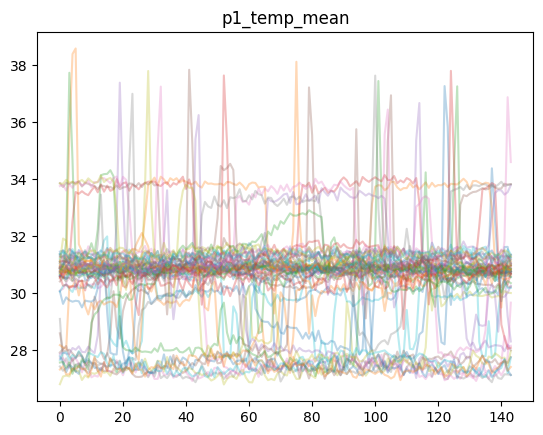

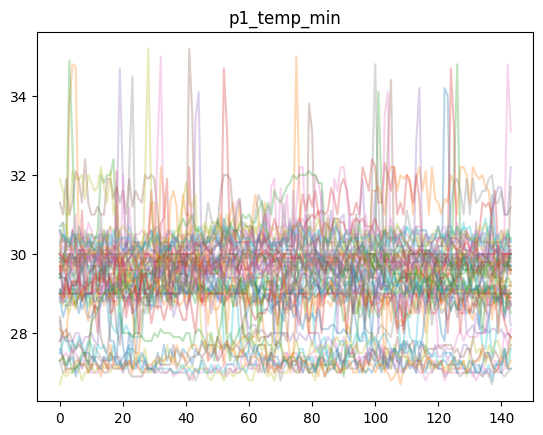

In [35]:
import matplotlib.pyplot as plt
length = 8640
for col in dfs[0].columns[3:-1]:
    window = 6*24 #96+720# 14*24*6
    for w in range(int(length/window)):
        plt.plot(range(len(dfs[0][window*w:window*(w+1)])), dfs[0][col][window*w:window*(w+1)], alpha=0.3)
    plt.title(col)
    plt.show()